In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

seed = 999
np.random.seed(seed)
tf.random.set_seed(seed)

# 피마 인디언을 대상으로 한 당뇨병 여부를 측정한 데이터 셋
- 768명의 데이터
- 8개의 특성과 1개의 라벨로 구성
    - 특성 : 과거 임신횟수, 공복혈당, 확장기혈압, 삼두근 피부주름 두께, 혈청 인슐린, 체질량지수, 당뇨병 가족력,나이
    - 라벨 : 당뇨여부(0:정상, 1:당뇨)

In [11]:
col = ["임신횟수","공복혈당","기혈압","피부주름두께","인슐린","체질량지수","가족력","나이","당뇨여부"]
data = pd.read_csv("./Data/pima.csv",header=None,names=col)

In [12]:
data

,임신횟수,공복혈당,기혈압,피부주름두께,인슐린,체질량지수,가족력,나이,당뇨여부
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신횟수    768 non-null    int64  
 1   공복혈당    768 non-null    int64  
 2   기혈압     768 non-null    int64  
 3   피부주름두께  768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   체질량지수   768 non-null    float64
 6   가족력     768 non-null    float64
 7   나이      768 non-null    int64  
 8   당뇨여부    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe()
# 편향 : 50% 위치값과 mean을 비교했을때 차이가 크면 편향이 있음
# 이상치 : min과 25%, max와 75% 값의 차이가 다른 범위에 비해 큰 것, min이 너무 작거나 max가 너무 큰 것
# 분산

,임신횟수,공복혈당,기혈압,피부주름두께,인슐린,체질량지수,가족력,나이,당뇨여부
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 특성과 라벨간의 상관관계 분석
    - 양의 상관관계 : 특성이 증가하면 라벨도 증가
    - 음의 상관관계 : 특성이 증가해면 라벨은 감소
    - 0의 상관관계 : 특성과 라벨이 관련이 없는 경우
    - 상관관계가 연관성을 나타내지는 않는다

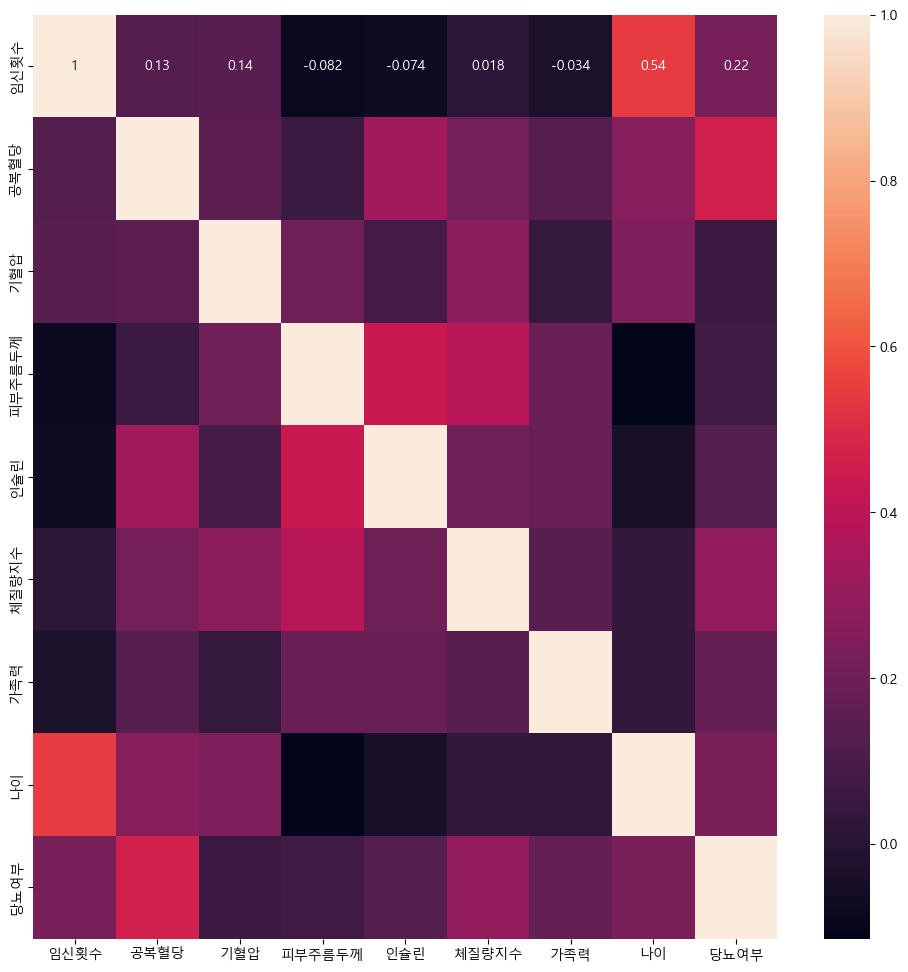

In [18]:
plt.figure(figsize=(12,12))

# 한글 설정
font_path = "./data/MALGUN.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
# corr() : 상관관계함수
# heatmap() : 두가지 파라마터의 관계를 색상과 수치로 시각화하는 도구
sns.heatmap(data.corr(), annot=True)
plt.show()

- 다중 공선성 문제
    - 특성과 라벨간에 상관관계가 더 높다면(0.8이상) 해당 특성을 삭제하거나 변환해서 사용
    - 특성과 특성간에 상관관계가 높다면 (0.8이상) 라벨과 비교해서 상관관계가 더 낮은 특성을 삭제하거나 변환해서 사용

In [19]:
X = data.drop("당뇨여부",axis=1)
y = data["당뇨여부"]

In [20]:
X.shape,y.shape

((768, 8), (768,))

In [21]:
# 라벨의 클래스 값들이 숫자형태인 경우에만 사용
from tensorflow.keras.utils import to_categorical

y_en = to_categorical(y)
y_en.shape

(768, 2)

In [149]:
m1 = Sequential()

In [150]:
m1.add(Dense(units=12,input_dim=8,activation="sigmoid"))
m1.add(Dense(units=6,activation="sigmoid"))
m1.add(Dense(units=2,activation="softmax"))
m1.summary()

c:\Users\SMHRD\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)               │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200 (800.00 B)

 Trainable params: 200 (800.00 B)

 Non-trainable params: 0 (0.00 B)

In [151]:
m1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
h1 = m1.fit(X,y_en,batch_size=8,epochs=30)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.4963 - loss: 0.7126
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.6682 - loss: 0.6616
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.6682 - loss: 0.6439
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.6682 - loss: 0.6336
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.6682 - loss: 0.6283
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.6682 - loss: 0.6247
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.6682 - loss: 0.6209
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.6682 - loss: 0.6180
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6682 - loss: 0.6154
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.6682 - loss: 0.6130
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.6682 - loss: 0.6107
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step

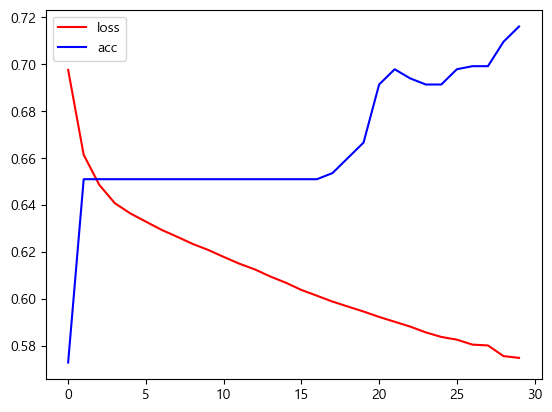

In [152]:
plt.plot(h1.history["loss"],color='r',label="loss")
plt.plot(h1.history["accuracy"],color='b',label="acc")
plt.legend()
plt.show()

# 붓꽃 데이터를 이용한 다진분류
- 150개의 데이터 구성
- 4개의 특성으로 구성(꽃받침의 너비,길이,꽃잎의 너비,길이)
- 라벨데이터는 3개의 클래스로 구성


In [156]:
from sklearn.datasets import load_iris
iris = load_iris()

In [158]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [163]:
# 라벨 데이터의 클래스 확인
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [164]:
# 특성/ㄹ벨데이터 저장
X = iris["data"]
y = iris["target"]
X.shape, y.shape

((150, 4), (150,))

In [166]:
y_en = to_categorical(y)
y_en.shape

(150, 3)

In [202]:
m2 = Sequential()

In [203]:
m2.add(Dense(units=12,input_dim=4,activation="sigmoid"))
m2.add(Dense(units=6,activation="sigmoid"))
m2.add(Dense(units=3,activation="softmax"))
m2.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_149 (Dense)               │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [204]:
m2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
h2 = m2.fit(X,y_en,batch_size=8,epochs=50)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.3798 - loss: 1.1220
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3798 - loss: 1.1093 
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.3798 - loss: 1.1015
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.3798 - loss: 1.0963
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.3798 - loss: 1.0928
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.3798 - loss: 1.0901
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3798 - loss: 1.0876 
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.3798 - loss: 1.0851
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5296 - loss: 1.0823
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.7069 - loss: 1.0790
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7069 - loss: 1.0751
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step -

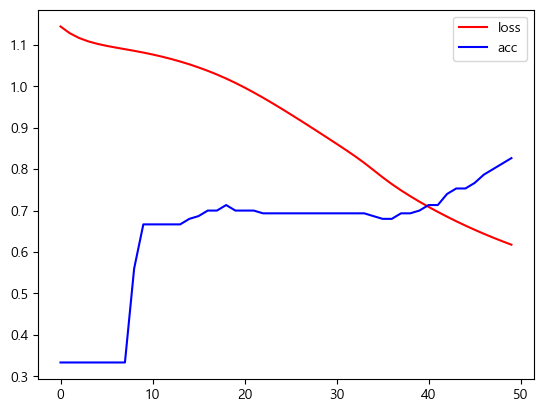

In [205]:
plt.plot(h2.history["loss"],color='r',label="loss")
plt.plot(h2.history["accuracy"],color='b',label="acc")
plt.legend()
plt.show()

# 보스턴 집값 데이터를 이용한 회귀분석
- 506개의 데이터로 구성
- 13개의 특성 구성
- 라벨 : 집값($1000단위)

- 특성 중에 B(흑인비율) : 인종차별문제로 인해 sklearn에서는 삭제-> 캘리포니아 집값데이터셋 사용

In [208]:
from tensorflow.keras.datasets import boston_housing

(X_train,y_train),(X_test,y_test) = boston_housing.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

# 신경망 설계

In [220]:
m3 = Sequential()

In [221]:
m3.add(Dense(units=26,input_dim=13,activation="sigmoid"))
m3.add(Dense(units=13,activation="sigmoid"))
m3.add(Dense(units=8,activation="sigmoid"))
#출력층에서 회귀분석의 경우에는 units은 1, 활성화함수는 생략
m3.add(Dense(units=1))
m3.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_164 (Dense)               │ (None, 26)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 13)             │           351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 836 (3.27 KB)

 Trainable params: 836 (3.27 KB)

 Non-trainable params: 0 (0.00 B)

In [222]:
m3.compile(optimizer="adam",loss="mse")
h3 = m3.fit(X_train,y_train,batch_size=8,epochs=300)

Epoch 1/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 670.2462
Epoch 2/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 642.7997
Epoch 3/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 619.8485
Epoch 4/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 602.5837
Epoch 5/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 589.8297
Epoch 6/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 579.6978
Epoch 7/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 569.5518
Epoch 8/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 558.8143
Epoch 9/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 549.0548
Epoch 10/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 540.3388
Epoch 11/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 532.3140
Epoch 12/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 524.7480
Epoch 13/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 517.4905
Epoch 14/300
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 510.3960
Epoch 15/300
51

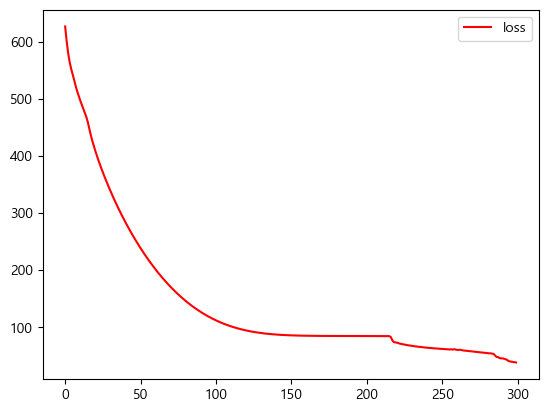

In [223]:
plt.plot(h3.history["loss"],color='r',label="loss")
# plt.plot(h3.history["accuracy"],color='b',label="acc")
plt.legend()
plt.show()